In [ ]:
import keras
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [ ]:
# Load of necessary libraries
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

In [ ]:
# to make the example replicable
np.random.seed(42)
# Load of the dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 6s 0us/step


## Without Data Pre-Processing

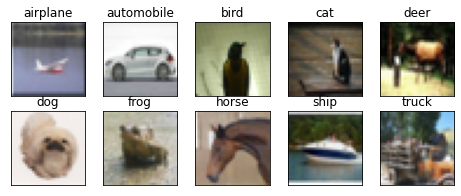

In [ ]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(Y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()

In [ ]:
# Initializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))
# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 84s 131ms/step - loss: 4.1377 - accuracy: 0.4965 - val_loss: 1.1353 - val_accuracy: 0.6052
Epoch 2/10
391/391 [==============================] - 51s 130ms/step - loss: 0.8208 - accuracy: 0.7226 - val_loss: 1.0968 - val_accuracy: 0.6236
Epoch 3/10
391/391 [==============================] - 51s 129ms/step - loss: 0.3947 - accuracy: 0.8741 - val_loss: 1.1186 - val_accuracy: 0.6478
Epoch 4/10
391/391 [==============================] - 51s 130ms/step - loss: 0.1305 - accuracy: 0.9653 - val_loss: 1.2917 - val_accuracy: 0.6549
Epoch 5/10
391/391 [==============================] - 51s 130ms/step - loss: 0.0422 - accuracy: 0.9921 - val_loss: 1.5424 - val_accuracy: 0.6558
Epoch 6/10
391/391 [==============================] - 51s 130ms/step - loss: 0.0205 - accuracy: 0.9962 - val_loss: 1.6278 - val_accuracy: 0.6423
Epoch 7/10
391/391 [==============================] - 51s 130ms/step - loss: 0.0285 - accuracy: 0.9935 - val_loss: 1.7009 - val_ac

Validation accuracy much less than accuracy. This is because we have not pre-processed the data before feeding it to the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              88605696  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 88,914,698
Trainable params: 88,914,698
Non-trainable params: 0
____________________________________________

## With Data Pre-Processing

To pre-process, we need to center the data and normalize the data (aka z-score to set all of the data on the same scale).

We must normalize only on the trainig set.

In [ ]:
# Cenetering the data
X_train_mean = np.mean(X_train, axis = 0)
X_train_cent = X_train - X_train_mean

# Normalization
X_train_std = np.std(X_train, axis = 0)
X_train_norm = X_train_cent / X_train_std

In [ ]:
X_test_norm = (X_test - X_train_mean) / X_train_std

In [ ]:
# Initializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))
# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])


Epoch 1/10
391/391 [==============================] - 54s 137ms/step - loss: 6.3121 - accuracy: 0.4607 - val_loss: 1.3019 - val_accuracy: 0.5369
Epoch 2/10
391/391 [==============================] - 53s 136ms/step - loss: 1.0450 - accuracy: 0.6368 - val_loss: 1.1273 - val_accuracy: 0.6097
Epoch 3/10
391/391 [==============================] - 53s 137ms/step - loss: 0.7012 - accuracy: 0.7621 - val_loss: 1.1706 - val_accuracy: 0.5986
Epoch 4/10
391/391 [==============================] - 54s 137ms/step - loss: 0.3888 - accuracy: 0.8735 - val_loss: 1.1987 - val_accuracy: 0.6296
Epoch 5/10
391/391 [==============================] - 54s 137ms/step - loss: 0.1739 - accuracy: 0.9484 - val_loss: 1.4607 - val_accuracy: 0.6214
Epoch 6/10
391/391 [==============================] - 54s 137ms/step - loss: 0.0778 - accuracy: 0.9799 - val_loss: 1.6466 - val_accuracy: 0.6294
Epoch 7/10
391/391 [==============================] - 53s 137ms/step - loss: 0.0457 - accuracy: 0.9888 - val_loss: 1.7987 - val_ac

Result is quite the same as the last model. The validaition accuracy is still doing significantly worse than the accuracy. This is due to overfitting, meaning that the model performs poorly when introduced to unseen data. The algorithm that works very well in our data set, but is extremely bad at generalizing. Overfitting occurs when our model is overly sensitive/attuned to the training set patterns we are sampling from. Overfitting recognizes patterns in the sample that actually aren't there when you look at the full population of the data. To combat overfitting, let's create an algorithm that is capable of generalizing more.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              88605696  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 88,914,698
Trainable params: 88,914,698
Non-trainable params: 0
__________________________________________

## Batch Normalization

Batch normalization reduces the change of internal covariates, or Internal Covariate Shift, which makes the network more robust to bad initializations.

Internal Covariate: the change in the distribution of network activations due to the different distribution of input data between mini-batches. 
- The lesser this difference between mini-batches, the more similar the data that reaches the network filters, the more similar the activation maps will be, and the better the network training will work.

As we are calculating the average and standard deviation for each mini-batch, instead of for the whole dataset, the batch norm also introduces some noise that acts as a regulator and helps to reduce overfitting

In [ ]:
# We Import Batch Normalizarion layer
from keras.layers import BatchNormalization, Activation
# Inizializting the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# We include our classifier
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Training the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) 
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 61s 153ms/step - loss: 1.4993 - accuracy: 0.5330 - val_loss: 1.3865 - val_accuracy: 0.5328
Epoch 2/10
391/391 [==============================] - 60s 152ms/step - loss: 0.6950 - accuracy: 0.7647 - val_loss: 0.9719 - val_accuracy: 0.6664
Epoch 3/10
391/391 [==============================] - 60s 152ms/step - loss: 0.3006 - accuracy: 0.9172 - val_loss: 0.9390 - val_accuracy: 0.6842
Epoch 4/10
391/391 [==============================] - 60s 152ms/step - loss: 0.0853 - accuracy: 0.9895 - val_loss: 0.9753 - val_accuracy: 0.6957
Epoch 5/10
391/391 [==============================] - 60s 153ms/step - loss: 0.0225 - accuracy: 0.9997 - val_loss: 1.0280 - val_accuracy: 0.7006
Epoch 6/10
391/391 [==============================] - 60s 154ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.0595 - val_accuracy: 0.7078
Epoch 7/10
391/391 [==============================] - 60s 153ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.0799 - val_ac

We can see that the accuracy has improved by 1%, and the validation accuracy has improved by 10%. With an accuracy of almost 100% and a validation accuracy of about 70%. The model is still overfit, but it is better at predicting than the previous models.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 128)      

## Regularization

Regularization consists of penalizing in some way the predictions made by our network during training so that it does not think that the training set is the absolute truth and thus knows how to better generalize when it sees other datasets. We want a model that works on all of the data that we could possibly get for the problem that we have. We knaow that alot of our variables are going to have relationships with our outcome variable, but we try to make the variables prove themselves based on how strong each variable's relationship actually is to the outcome.

## L2 regularization (Lasso regularization)

L2 regularization penalizes the loss function by adding the term 1/2 * λ * W**2 for each weight. This means is that we penalize very high or low weights, and assess them as of similar magnitude. Weights imply the importance of each neuron in the final calculation of the prediction. So, by penalizing the extreme weights, we get all the neurons to matter more or less equally, so the network will use all its neurons to make the prediction.

This is a variable selection tool. The coefficients are more likely to reusult in exactly 0 rather than just a small value. Lasso takes some of our coefficients , puts them to exactly 0, removing them from our model.

In [ ]:
# L2 Regularization
# Regularizer layer import
from keras.regularizers import l2
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
# L2 defined at FCL
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 65s 166ms/step - loss: 3.6470 - accuracy: 0.4620 - val_loss: 1.5340 - val_accuracy: 0.5277
Epoch 2/10
391/391 [==============================] - 64s 165ms/step - loss: 1.4397 - accuracy: 0.5640 - val_loss: 1.3524 - val_accuracy: 0.5916
Epoch 3/10
391/391 [==============================] - 65s 165ms/step - loss: 1.3281 - accuracy: 0.6050 - val_loss: 1.3069 - val_accuracy: 0.6126
Epoch 4/10
391/391 [==============================] - 65s 166ms/step - loss: 1.2509 - accuracy: 0.6363 - val_loss: 1.2359 - val_accuracy: 0.6382
Epoch 5/10
391/391 [==============================] - 65s 166ms/step - loss: 1.2031 - accuracy: 0.6561 - val_loss: 1.2060 - val_accuracy: 0.6523
Epoch 6/10
391/391 [==============================] - 65s 166ms/step - loss: 1.1573 - accuracy: 0.6720 - val_loss: 1.1676 - val_accuracy: 0.6694
Epoch 7/10
391/391 [==============================] - 65s 166ms/step - loss: 1.1282 - accuracy: 0.6837 - val_loss: 1.1358 - val_ac

The accuracy and validation accruacy seem to be ver similar with a value of about 70%. Though the accuracies are not very high, there is almost no overfitting as we used regularization (lasso) in this model.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
flatten_3 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              88605696  
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 88,914,698
Trainable params: 88,914,698
Non-trainable params: 0
__________________________________________

## L1 regularization (Ridge regularization)

L1 regularization manages to convert the W weight matrix into a sparse weight matrix (very close to zero, except for a few elements). Unlike L2, it gives much more importance to some neurons than others, making the network more robust to possible noise. L2 is usually better in giving us better results, but in this case we can use L1 to give us good classification of images given a certain number of characteristics in the image. It will also avoid being distorted by noise.

Ridge regression takes the small coefficients (predictors that do not have as much of a strong relationship with the outcome) in our model and makes them a lot smaller (not zero necessarily). If there is a really small relationship between our input X and output Y, that means it is proabbly just noise from the data and doesn't apply to the whole population, so we make the variable really small so it doesn't affect the model very much.

If we want the meaningless coefficeints to still exist in our model, we would use Ridge. If we want the coeffiecients that are small to go to exactly 0 (meaning they are not part of the model at all), then we use Lasso.

In [ ]:
# L1 Regularization
# Regularizer layer import
from keras.regularizers import l1
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 65s 165ms/step - loss: 284.1632 - accuracy: 0.2264 - val_loss: 12.8956 - val_accuracy: 0.2768
Epoch 2/10
391/391 [==============================] - 64s 164ms/step - loss: 12.4334 - accuracy: 0.3001 - val_loss: 12.1972 - val_accuracy: 0.3285
Epoch 3/10
391/391 [==============================] - 64s 164ms/step - loss: 12.0883 - accuracy: 0.3460 - val_loss: 11.9444 - val_accuracy: 0.3430
Epoch 4/10
391/391 [==============================] - 64s 164ms/step - loss: 11.8759 - accuracy: 0.3765 - val_loss: 11.7150 - val_accuracy: 0.3991
Epoch 5/10
391/391 [==============================] - 64s 164ms/step - loss: 11.7139 - accuracy: 0.3953 - val_loss: 11.6087 - val_accuracy: 0.3946
Epoch 6/10
391/391 [==============================] - 64s 164ms/step - loss: 11.5507 - accuracy: 0.4131 - val_loss: 11.5288 - val_accuracy: 0.4016
Epoch 7/10
391/391 [==============================] - 64s 164ms/step - loss: 11.4451 - accuracy: 0.4218 - val_loss: 1

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
flatten_4 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              88605696  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 88,914,698
Trainable params: 88,914,698
Non-trainable params: 0
__________________________________________

In [ ]:
# Elastic Net Regularization (L1 + L2)
# Regularizer layer import
from keras.regularizers import l1_l2
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01, 0.01)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 74s 187ms/step - loss: 285.4673 - accuracy: 0.2450 - val_loss: 12.9348 - val_accuracy: 0.2750
Epoch 2/10
391/391 [==============================] - 72s 185ms/step - loss: 12.5016 - accuracy: 0.3100 - val_loss: 12.1804 - val_accuracy: 0.3364
Epoch 3/10
391/391 [==============================] - 72s 185ms/step - loss: 11.9850 - accuracy: 0.3442 - val_loss: 11.8667 - val_accuracy: 0.3550
Epoch 4/10
391/391 [==============================] - 72s 185ms/step - loss: 11.7624 - accuracy: 0.3679 - val_loss: 11.6773 - val_accuracy: 0.3684
Epoch 5/10
391/391 [==============================] - 72s 185ms/step - loss: 11.6363 - accuracy: 0.3870 - val_loss: 11.5668 - val_accuracy: 0.4051
Epoch 6/10
391/391 [==============================] - 72s 185ms/step - loss: 11.5816 - accuracy: 0.3977 - val_loss: 11.6113 - val_accuracy: 0.4013
Epoch 7/10
391/391 [==============================] - 72s 185ms/step - loss: 11.5723 - accuracy: 0.4078 - val_loss: 1

As we can see, while the regularization method did prevent overfitting, L2 performed significanly worse than the previous models with an accuracy of 40%. This means that the coefficeints that do not have as stong of a relationship with the outcome are noise in the dataset. While we cen see in the ridge model, it had a more accurate performance in generalization as it set the irrelevant variables to 0, the irrelevant variables in the lasso model are still affecting the model in some way because the information is still rather than being not even being considered in the model. This is allowing the model to perform poorly in comparison with the other models.

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
flatten_5 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              88605696  
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 88,914,698
Trainable params: 88,914,698
Non-trainable params: 0
__________________________________________

## Max norm constraints

This is another type of regularization based on restrictions. In this model, we can set a maximum threshold that the weights cannot exceed. Doing this with this normalization prevents the network from exploding or the weights from growing excessively.

In [ ]:
# Max norm constraints
# Elastic Net Regularization (L1 + L2)
# Regularizer layer import
#from keras.constraints import max_norm
from tensorflow.keras.constraints import max_norm
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])


Epoch 1/10
391/391 [==============================] - 60s 152ms/step - loss: 1.4309 - accuracy: 0.4909 - val_loss: 1.2107 - val_accuracy: 0.5732
Epoch 2/10
391/391 [==============================] - 60s 152ms/step - loss: 1.0260 - accuracy: 0.6428 - val_loss: 0.9994 - val_accuracy: 0.6525
Epoch 3/10
391/391 [==============================] - 59s 152ms/step - loss: 0.8252 - accuracy: 0.7159 - val_loss: 0.9573 - val_accuracy: 0.6708
Epoch 4/10
391/391 [==============================] - 59s 152ms/step - loss: 0.6516 - accuracy: 0.7794 - val_loss: 0.9340 - val_accuracy: 0.6855
Epoch 5/10
391/391 [==============================] - 59s 151ms/step - loss: 0.4958 - accuracy: 0.8355 - val_loss: 0.9093 - val_accuracy: 0.6997
Epoch 6/10
391/391 [==============================] - 59s 152ms/step - loss: 0.3483 - accuracy: 0.8882 - val_loss: 1.0139 - val_accuracy: 0.6906
Epoch 7/10
391/391 [==============================] - 59s 152ms/step - loss: 0.2094 - accuracy: 0.9386 - val_loss: 1.0312 - val_ac

The model did not really perform any better in terms of overfitting and performace because the validation accuracy is still lower than the accuracy and the accuracy is around 98% whereas the validation score is 68%. This means that this model was not very effecting in normalizing the data as there is no need to set a maximum threshold in terms of this model. 

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
flatten_6 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              88605696  
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10250     
Total params: 88,914,698
Trainable params: 88,914,698
Non-trainable params: 0
__________________________________________

## Dropout regularization

This model consists of keeping a neuron active or setting it to 0 during training with a probability p. Doing this, we can change the architecture of the network at training time, which means that there will not be a single neuron responsible for being activated to a certain pattern, but we will have multiple redundant neurons capable of reacting to that pattern.

In [ ]:
# Dropout
# Dropout layer import
from keras.layers import Dropout
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
391/391 [==============================] - 96s 163ms/step - loss: 1.5827 - accuracy: 0.4352 - val_loss: 1.2769 - val_accuracy: 0.5512
Epoch 2/10
391/391 [==============================] - 62s 158ms/step - loss: 1.2096 - accuracy: 0.5734 - val_loss: 1.0692 - val_accuracy: 0.6234
Epoch 3/10
391/391 [==============================] - 62s 158ms/step - loss: 1.0197 - accuracy: 0.6420 - val_loss: 0.9526 - val_accuracy: 0.6698
Epoch 4/10
391/391 [==============================] - 62s 158ms/step - loss: 0.8772 - accuracy: 0.6956 - val_loss: 0.8980 - val_accuracy: 0.6847
Epoch 5/10
391/391 [==============================] - 62s 158ms/step - loss: 0.7559 - accuracy: 0.7386 - val_loss: 0.8604 - val_accuracy: 0.7037
Epoch 6/10
391/391 [==============================] - 62s 158ms/step - loss: 0.6451 - accuracy: 0.7775 - val_loss: 0.8548 - val_accuracy: 0.7061
Epoch 7/10
391/391 [==============================] - 62s 158ms/step - loss: 0.5412 - accuracy: 0.8124 - val_loss: 0.8361 - val_ac

Better than the Max Norm model but still a little overfit.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

## Dropout & Max Norm

In [ ]:
# Dropout & Max Norm
# Dropout & Max Norm layers import
from keras.layers import Dropout
#from keras.constraints import max_norm
from tensorflow.keras.constraints import max_norm
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Classifier inclusion
model.add(Flatten())
#model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
391/391 [==============================] - 68s 173ms/step - loss: 1.5796 - accuracy: 0.4324 - val_loss: 1.2531 - val_accuracy: 0.5573
Epoch 2/10
391/391 [==============================] - 67s 172ms/step - loss: 1.2073 - accuracy: 0.5732 - val_loss: 1.1006 - val_accuracy: 0.6120
Epoch 3/10
391/391 [==============================] - 67s 172ms/step - loss: 1.0190 - accuracy: 0.6436 - val_loss: 0.9634 - val_accuracy: 0.6672
Epoch 4/10
391/391 [==============================] - 67s 172ms/step - loss: 0.8686 - accuracy: 0.6956 - val_loss: 0.9025 - val_accuracy: 0.6883
Epoch 5/10
391/391 [==============================] - 67s 172ms/step - loss: 0.7377 - accuracy: 0.7417 - val_loss: 0.8731 - val_accuracy: 0.6981
Epoch 6/10
391/391 [==============================] - 67s 172ms/step - loss: 0.6289 - accuracy: 0.7817 - val_loss: 0.8464 - val_accuracy: 0.7123
Epoch 7/10
391/391 [==============================] - 67s 172ms/step - loss: 0.5152 - accuracy: 0.8219 - val_loss: 0.8609 - val_ac

Almost the same result as the previous model. So we can probably infer that Max Norm doesn't have much of an effect on our model.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            